In [84]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Analysis and preprocessing

## 1. finding variables

In [85]:
df= pd.read_csv('credit_risk.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [86]:
print(df.shape)

(1000, 21)


This data contains 1000 participants which is the instances and 21 features whihch are the columns.

In [87]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


The average of duration of loan is 20.9 months with shortest being 4 months and longest being 72 months. In overall distribution skewed right.
The average credit amount is 3271.26 units with the 25th quartile is at 1365.5 and 75th quartile is 3972.25. Distribution skewed right.
Average age is 35.5, ranging from 19 to 75 years.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

There are 7 columns are numerical data: 'duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents'. The remaining 14 columns are categorical.

## 2. visualisation

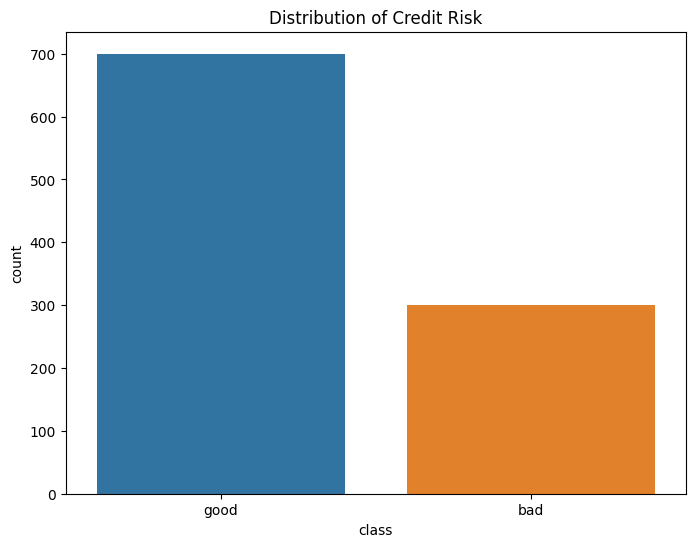

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Credit Risk')
plt.show()

This is some kind of unbalanced that there are more 'good' credit risk than the bad ones.

/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/626723896.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/626723896.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/626723896.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/626723896.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


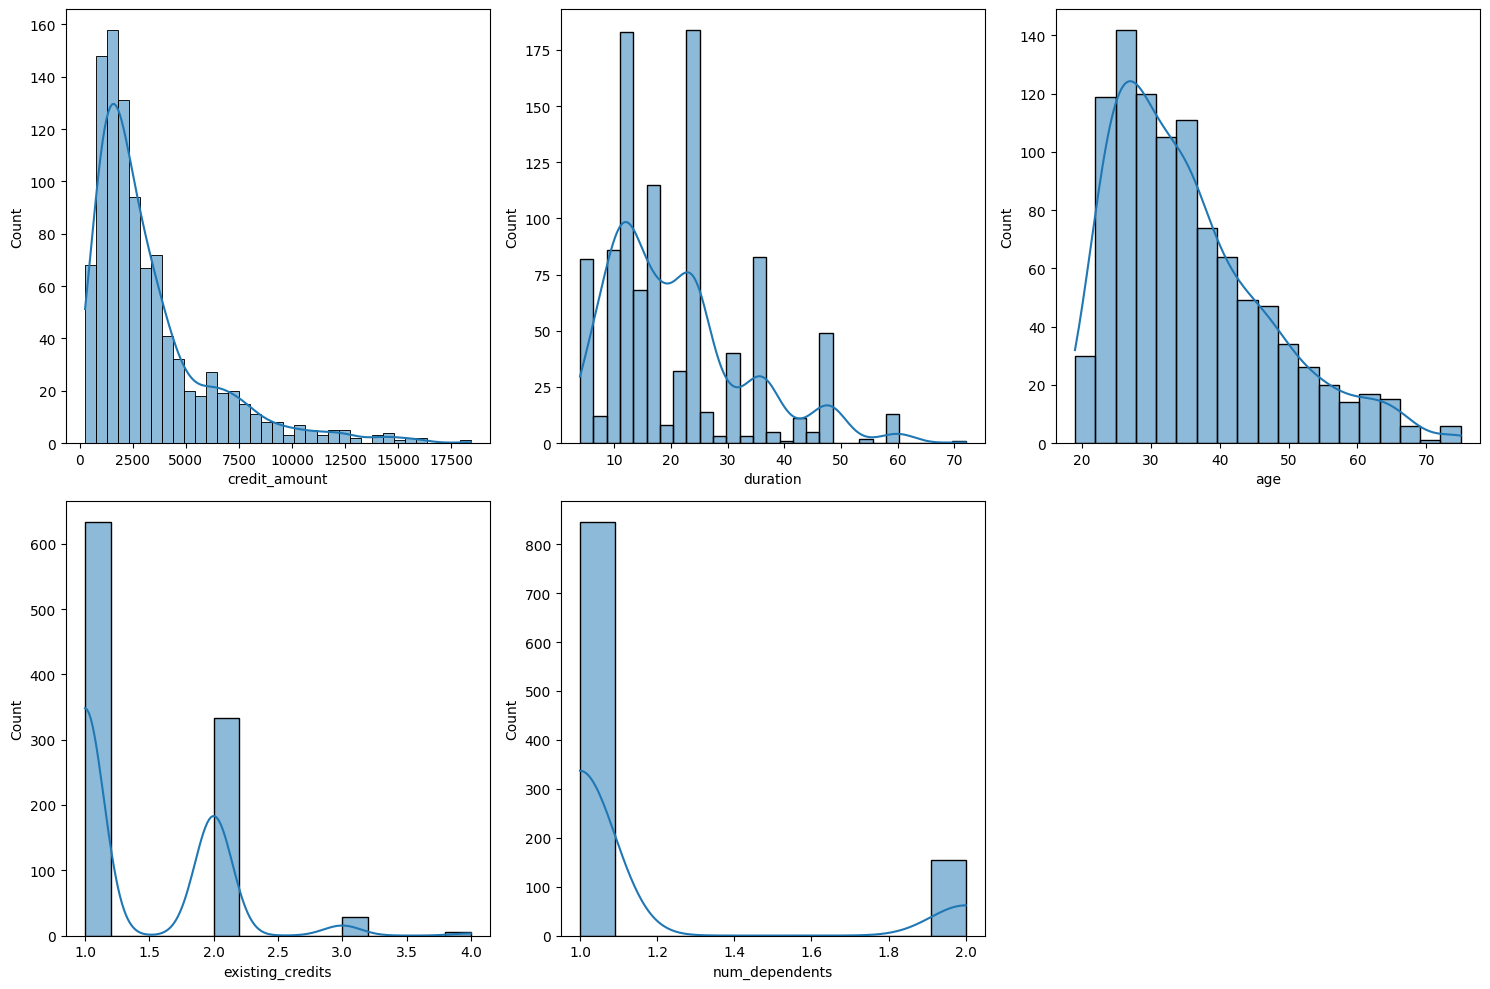

In [90]:
numerical_columns=['credit_amount', 'duration', 'age', 'existing_credits', 'num_dependents', 'installment_commitment', 'residence_since']
plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.subplot(2,3,i+1)
    sns.histplot(df[numerical_columns[i]], kde=True)
    plt.tight_layout()
plt.show()

The credit_amount distribution right-skewed with most has less than 5000 which means very few loans of high credit amounts. The duration is right-skewed with most are below 40. Most of the participants are aged between 20-40 and right-skewed. Very few has 3 existing credits most has 2 or below. Very few has more than two num-dependants. 

/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/338370745.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/338370745.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/338370745.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_50266/338370745.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


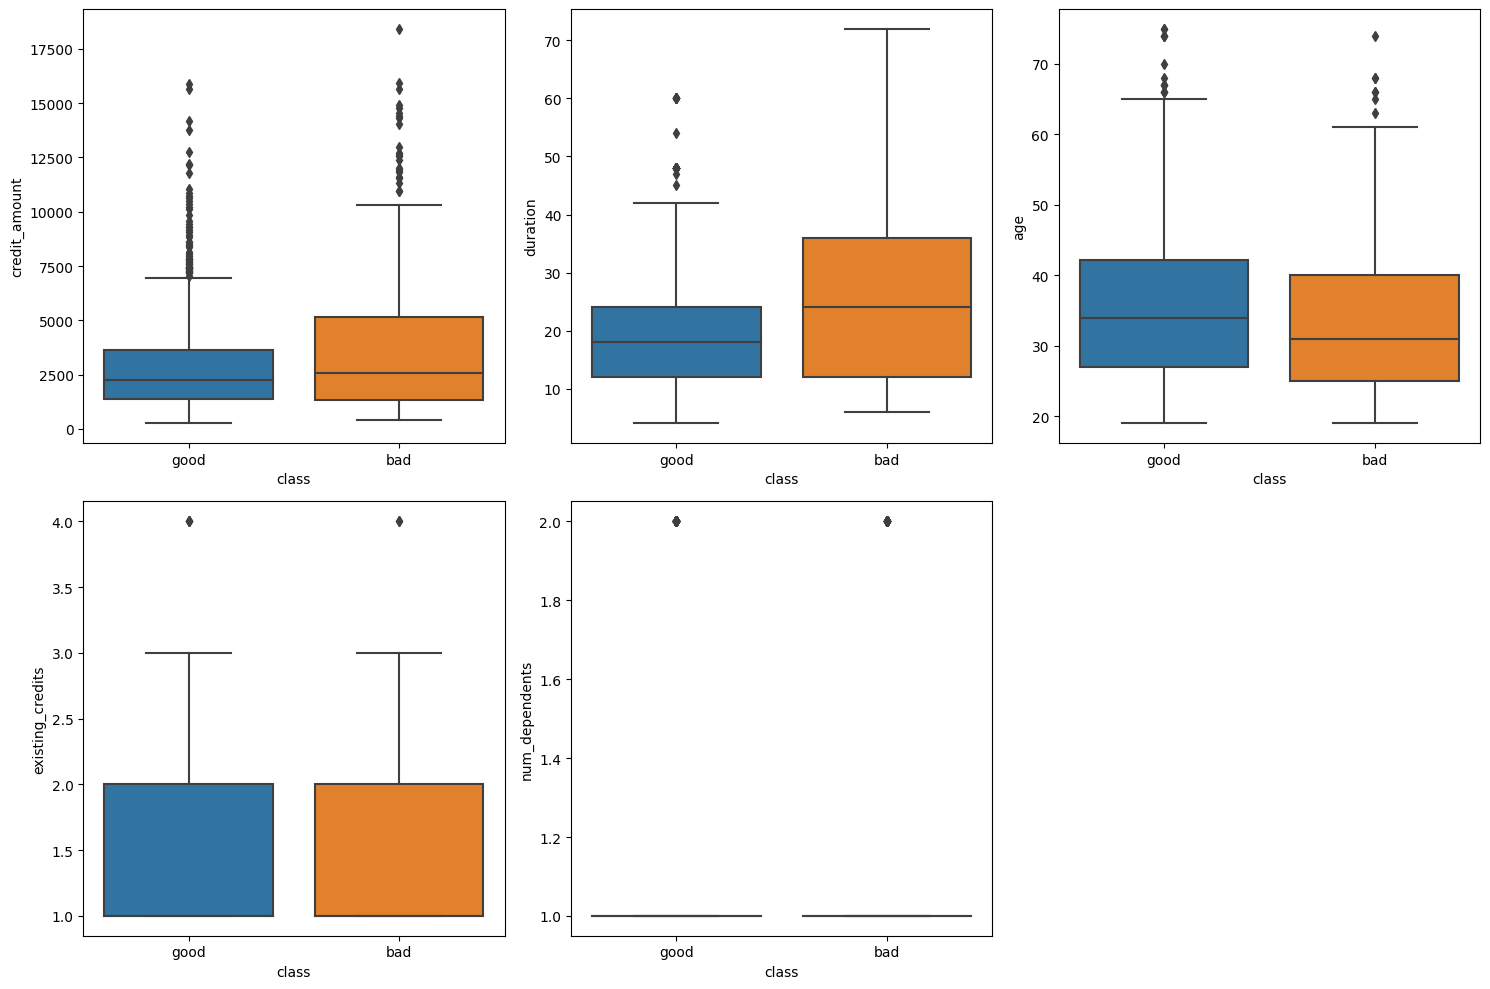

In [91]:
plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = 'class', y = numerical_columns[i], data = df)
    plt.tight_layout()
plt.show()

We look into distribution of the numerical columns in good/bad credit risks categories. 
'bad' credit risk group has slightly higher credit amounts than 'good' credit risk group with several outliers in each group.
'bad' credit risk group has longer durations distributions than 'good' credit risk group
Similar distribution in both groups. 'good' credit risk group has slightly higher age of participants.
No significant difference in existing credits and number of dependents

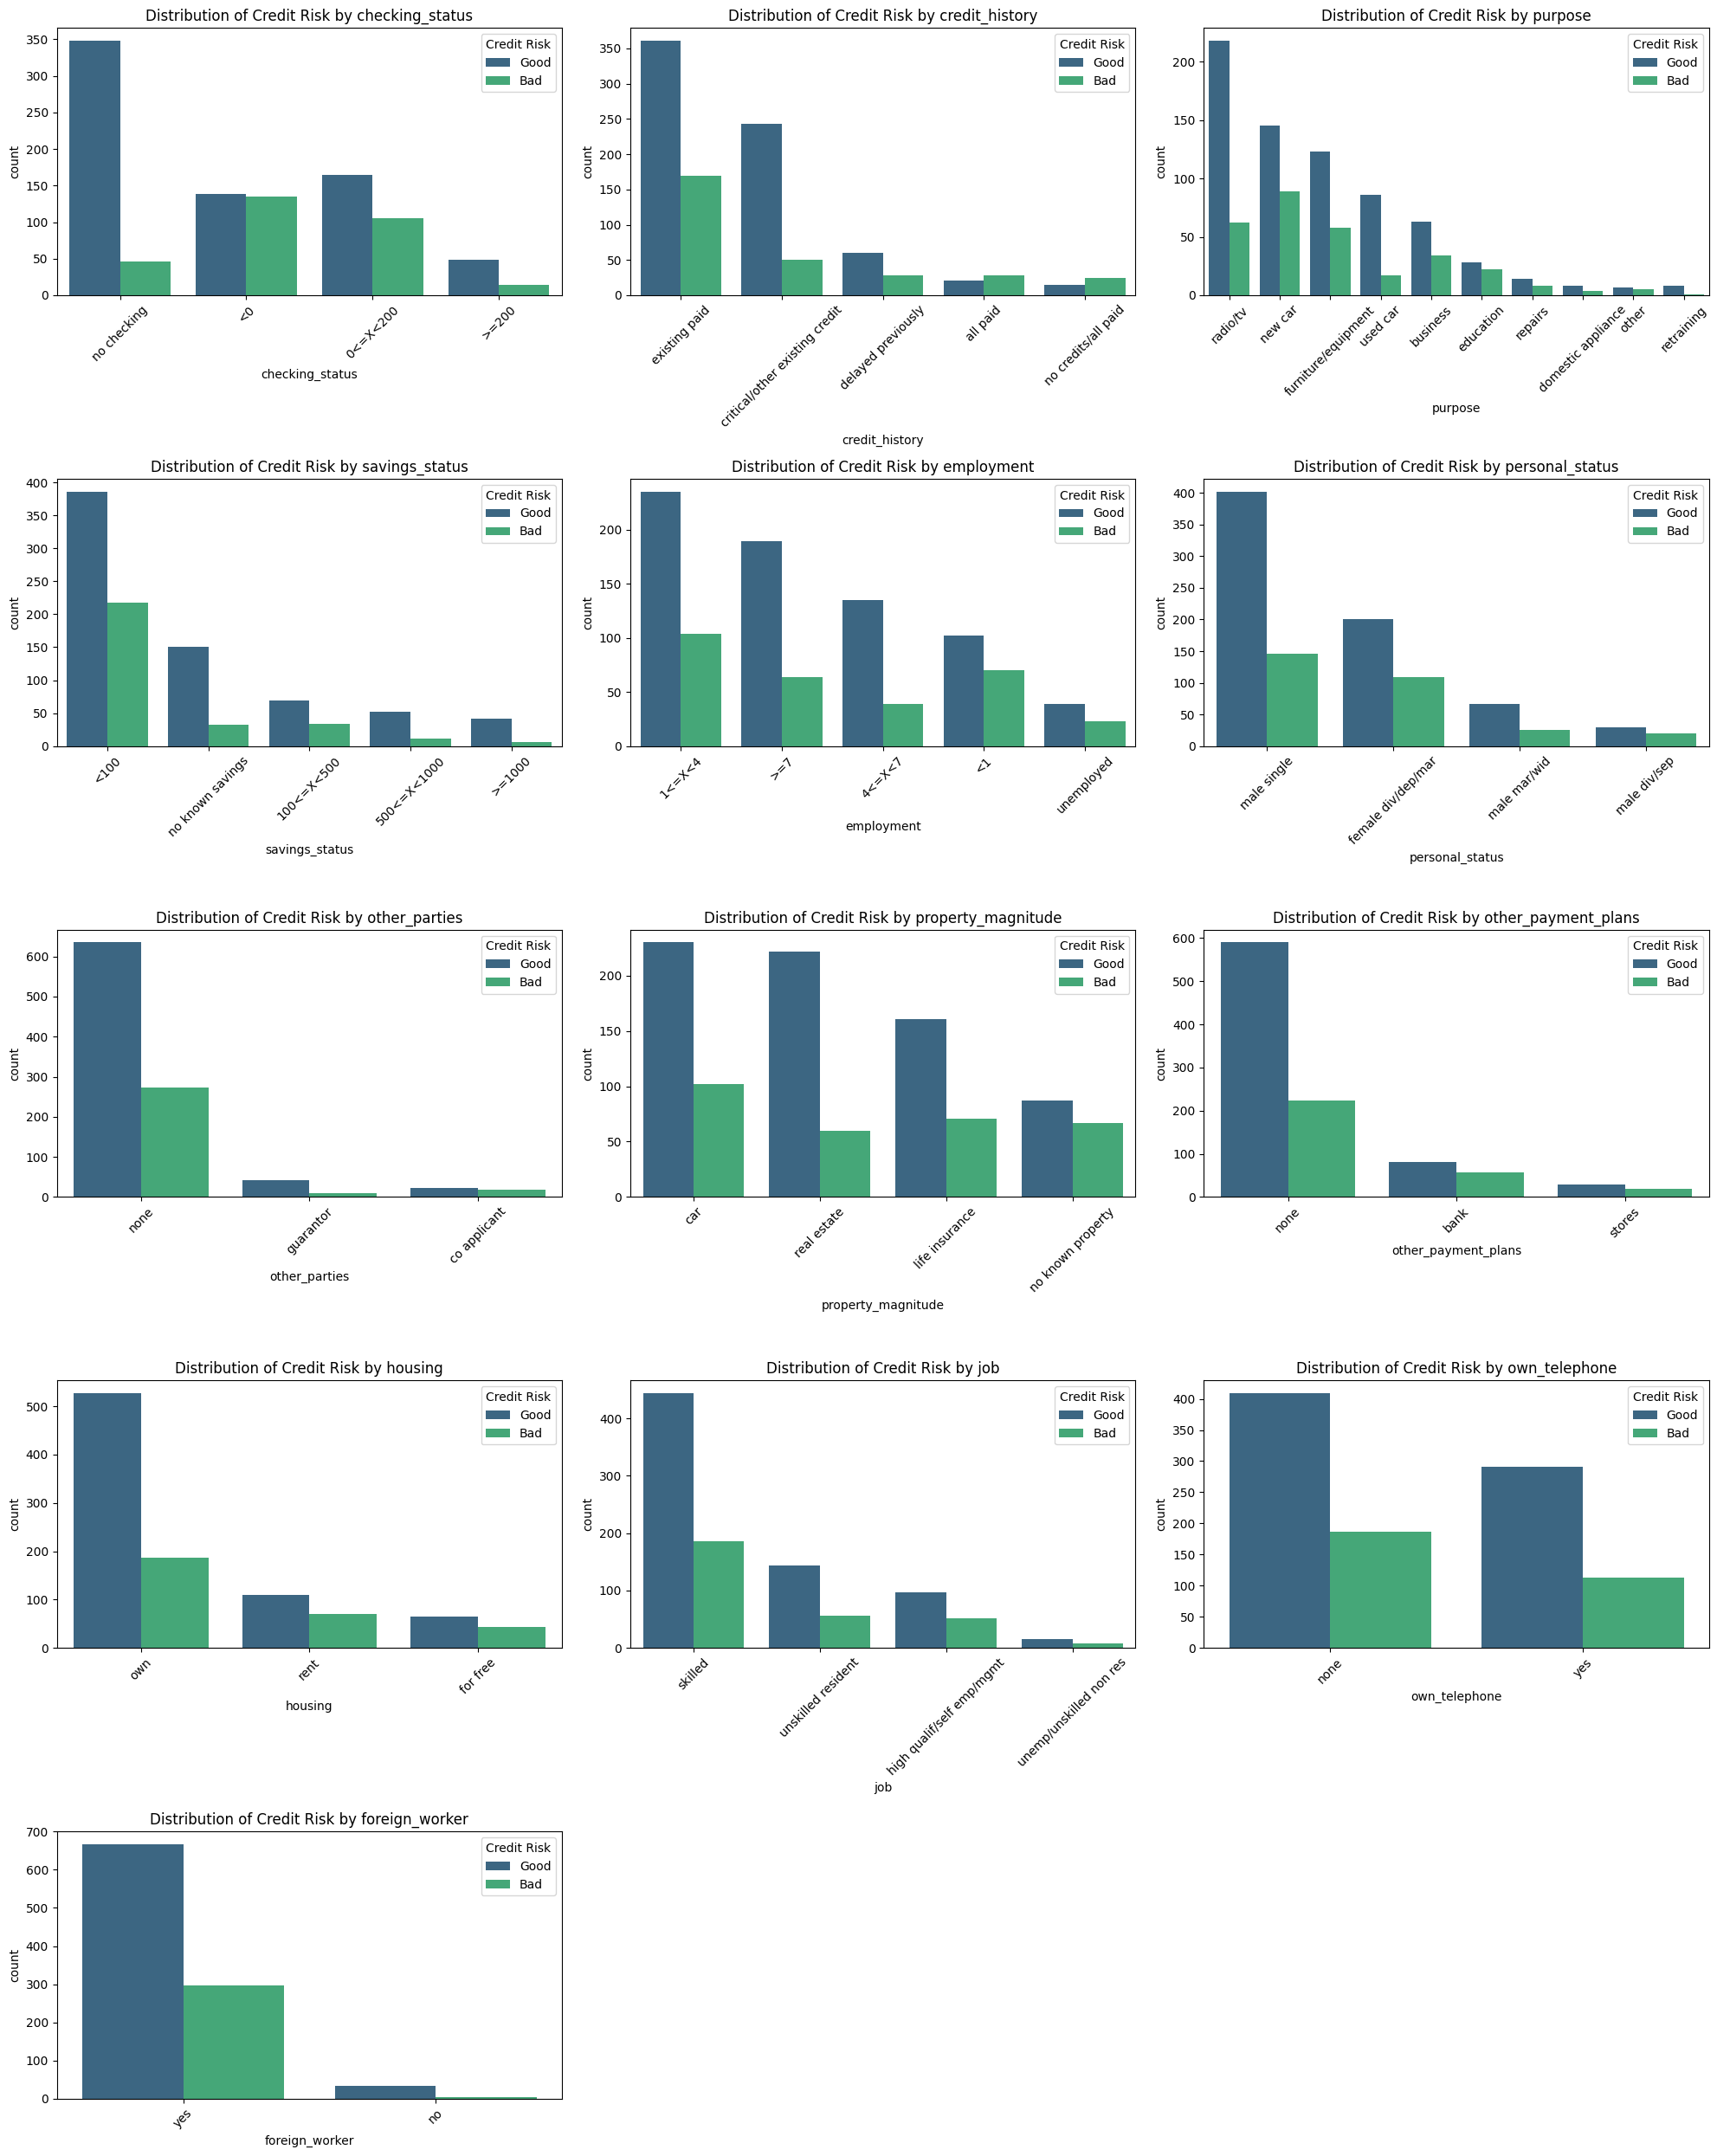

In [92]:
categorical_variables = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
plt.figure(figsize=(20, 25))
for idx, cat_var in enumerate(categorical_variables, 1):
    plt.subplot(5, 3, idx)
    sns.countplot(data=df, x=cat_var, hue='class', palette='viridis', order=df[cat_var].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Credit Risk by {cat_var}')
    plt.legend(title='Credit Risk', labels=['Good', 'Bad'])
    
plt.tight_layout()
plt.show()

Checking status: Borrowers with 'no checking' have much higher chance to be 'good' credit risk. Other checking status has much less difference between credit risk classes.

Credit history: Borrowers with 'critical/other existing credit' have much higher chance to be in 'good' credit risk. And the likelihood of being in 'good' credit risk classes decreases along the way from 'delayed previously', 'all paid', 'no creditors'

Savings status: Most of the 'good' credit risk rows distributed to '<100' in the saving status. 'No known savings' leans more towards 'good' credit risks.

Employment: Borrowers with '>=7' years of employment seem to have a higher likelihood of being classified as 'good' credit risks compared to other employment durations.

Property magnitude: 'Real estate' and 'life insurance' categories have a higher number of 'good' credit risks. 'No known property' leans more towards 'bad' credit risks.

Housing: Borrowers with 'own' housing have the highest number of 'good' credit risks.
'For free' leans slightly more towards 'bad' credit risks.

These variables has shown more indication of difference across sub-groups in categorical columns by the difference in credit risk classes.


## 3. data cleaning

In [93]:
missing_values = df.isnull().sum()
missing_values

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [98]:
df_encoded=pd.get_dummies(df, drop_first=True)
df_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes,class_good
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,True,False,False,...,True,False,True,False,True,False,False,True,True,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,False,False,True,...,True,False,True,False,False,False,True,False,True,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,True,False,False,...,True,False,False,False,True,False,False,False,True,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [99]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

# Initialize the StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.627770,-0.259299,-0.806328,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,1.214598,0.196014
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.614337,-0.259299,-0.806328,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.614337,-0.259299,1.240190,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.627770,-0.259299,-0.806328,...,-0.626704,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.627770,-0.259299,-0.806328,...,-0.626704,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014


One-hot encoding catalogical columns and scaling for further training and evaluation part.

In [100]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_predictions = baseline_rf.predict(X_test)

weights_rf = RandomForestClassifier(class_weight="balanced", random_state=42)
weights_rf.fit(X_train, y_train)
weights_predictions = weights_rf.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
weights_accuracy = accuracy_score(y_test, weights_predictions)
cmB = confusion_matrix(y_test, baseline_predictions)
cmW = confusion_matrix(y_test, weights_predictions)
crB = classification_report(y_test, baseline_predictions)
crW= classification_report(y_test, weights_predictions)
aucB= roc_auc_score(y_test, baseline_predictions)
aucW= roc_auc_score(y_test, weights_predictions)



print("Baseline score:", baseline_accuracy, cmB, crB, aucB)
print("Adjusted Class Weights score:", weights_accuracy, cmW, crW, aucW)


Baseline score: 0.7866666666666666 [[ 37  53]
 [ 11 199]]               precision    recall  f1-score   support

       False       0.77      0.41      0.54        90
        True       0.79      0.95      0.86       210

    accuracy                           0.79       300
   macro avg       0.78      0.68      0.70       300
weighted avg       0.78      0.79      0.76       300
 0.6793650793650794
Adjusted Class Weights score: 0.7666666666666667 [[ 33  57]
 [ 13 197]]               precision    recall  f1-score   support

       False       0.72      0.37      0.49        90
        True       0.78      0.94      0.85       210

    accuracy                           0.77       300
   macro avg       0.75      0.65      0.67       300
weighted avg       0.76      0.77      0.74       300
 0.6523809523809524


Both models have shown strong predictive capabilities. The baseline has higher accuracy, precision, and AUC than the random forest with adjusted class weights. [accuracy score: 78.67%>76.67%, precision score: 79%>78%, AUC score: 67.94%>65.24%]. Random forest with adjusted weight class produces more false positives which reduces precision.

Considering that we should just maintain this without the adjusted weights.

## 4. Correlation hotmaps

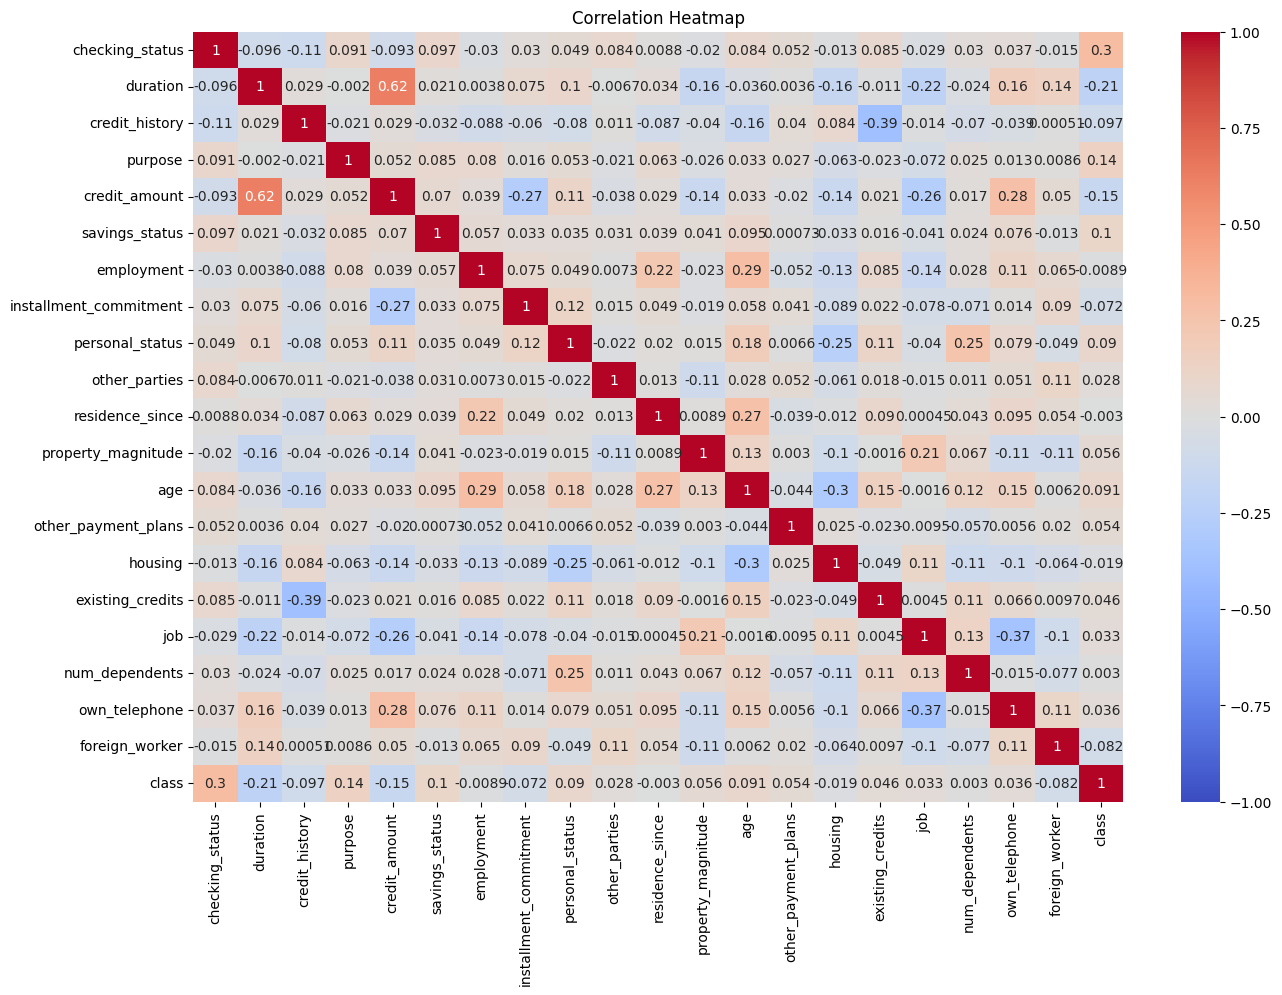

In [ ]:

categorical_cols = [cname for cname in df.columns if df[cname].dtype == 'object']
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()



The most positively correlated with 'class' is 'checking_status' which indicates significant association with 0.302. Other than checking status, purpose, saving status, age, personal status correlates with good credit risk with respectively Pearson correlation coefficients of 0.138, 0.103, 0.091, 0.089. 'Duration' is the most negatively correlated which indicates longer loan durations may have a better chance lead to 'bad' credit risk. Other than duration, installment commitment, foreign worker, credit history, credit amount correlates with bad credit risk with respectively Pearson correlation coefficients of -0.072, -0.082, -0.097, and -0.155.


## 5. Summary

The dataset contains 1000 participants which is the instances and 21 features whihch are the columns. There are no missing values. We find out that Checking status, Credit history, Savings status, Employment, Property magnitude, Housing variables are more indicateive on identifying the distribution of the credit risk groups. We underwent one-hot encoding categorical columns and scaling numerical columns for furtehr training and evaluation use. We tried to make adjustments on imbalance data but it suggests to stayput with the current dataset as the performance metrics say so. We made a correlation heatmap to see the relationships between features.

# Part 2: Training and Evaluation

In [ ]:
## 1: load and split

In [106]:
c_cols = [cname for cname in df.columns if df[cname].dtype == 'object' and cname != "class"]
n_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]


encoded_data = pd.get_dummies(df, columns=c_cols, drop_first=True)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   installment_commitment                         1000 non-null   float64
 3   residence_since                                1000 non-null   float64
 4   age                                            1000 non-null   float64
 5   existing_credits                               1000 non-null   float64
 6   num_dependents                                 1000 non-null   float64
 7   class                                          1000 non-null   object 
 8   checking_status_<0                             1000 non-null   bool   
 9   checking_status_>=200                          1000 n

It needs to be remade into a new one-hot encoding cause I have included the target variable in the one-hot encoding which would lead to key error.
All categorical columns except class is one-hot encoded.

## 2. Choosing models
We choose logistic regression, decision trees, and random forests as our models to compare and evaluate. Logistic regression is designed inherently for binary classification problems and provides linearity proof if some features and the log-odds of output are actually linear related. Decision trees works by splitting the whole dataset by one by one features until no further split could be made due to depth reached or no further improvement. This can model non-linear relationship between target and variables and less sensitive to outliers. Random forests is an ensemble method by making numerous decision trees from bootstrapping which would lead to different trees. Aggregating each tree would form up a majority of score on certain tree which would be used for final prediction. This can reduce overfitting and reduces variance compared to decision tree. 

## 3+4. Training and evaluation

In [107]:

X_encoded = encoded_data.drop("class", axis=1)
y_encoded = encoded_data["class"] == "good"

scaler = StandardScaler()
X_encoded[n_cols] = scaler.fit_transform(X_encoded[n_cols])

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=101
)

X_train_encoded.shape, X_test_encoded.shape



((700, 48), (300, 48))

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_cm = confusion_matrix(y_test, logreg_predictions)
logreg_cr = classification_report(y_test, logreg_predictions)
logreg_auc = roc_auc_score(y_test, logreg_predictions)

logreg_accuracy, logreg_cm, logreg_cr, logreg_auc


(0.7433333333333333,
 array([[ 39,  51],
        [ 26, 184]]),
 '              precision    recall  f1-score   support\n\n       False       0.60      0.43      0.50        90\n        True       0.78      0.88      0.83       210\n\n    accuracy                           0.74       300\n   macro avg       0.69      0.65      0.67       300\nweighted avg       0.73      0.74      0.73       300\n',
 0.6547619047619048)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train_encoded, y_train_encoded)

dt_predictions = dt_model.predict(X_test_encoded)

dt_accuracy = accuracy_score(y_test_encoded, dt_predictions)
dt_cm = confusion_matrix(y_test_encoded, dt_predictions)
dt_cr = classification_report(y_test_encoded, dt_predictions)
dt_auc = roc_auc_score(y_test_encoded, dt_predictions)

dt_accuracy, dt_cm, dt_cr, dt_auc


(0.7333333333333333,
 array([[ 42,  48],
        [ 32, 178]]),
 '              precision    recall  f1-score   support\n\n       False       0.57      0.47      0.51        90\n        True       0.79      0.85      0.82       210\n\n    accuracy                           0.73       300\n   macro avg       0.68      0.66      0.66       300\nweighted avg       0.72      0.73      0.73       300\n',
 0.6571428571428573)

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train_encoded, y_train_encoded)

rf_predictions_encoded = rf_model.predict(X_test_encoded)

rf_accuracy = accuracy_score(y_test_encoded, rf_predictions_encoded)
rf_cm = confusion_matrix(y_test_encoded, rf_predictions_encoded)
rf_cr = classification_report(y_test_encoded, rf_predictions_encoded)
rf_auc = roc_auc_score(y_test_encoded, rf_predictions_encoded)

rf_accuracy, rf_cm, rf_cr, rf_auc



(0.7566666666666667,
 array([[ 36,  54],
        [ 19, 191]]),
 '              precision    recall  f1-score   support\n\n       False       0.65      0.40      0.50        90\n        True       0.78      0.91      0.84       210\n\n    accuracy                           0.76       300\n   macro avg       0.72      0.65      0.67       300\nweighted avg       0.74      0.76      0.74       300\n',
 0.6547619047619048)

In [115]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

conf_matrices = [
    [[39, 51], [26, 184]],
    [[42, 48], [32, 178]],
    [[36, 54], [19, 191]]
]

confusion_dfs = {}

for model, matrix in zip(models, conf_matrices):
    df = pd.DataFrame(matrix, columns=['Predicted: False', 'Predicted: True'], index=['Actual: False', 'Actual: True'])
    confusion_dfs[model] = df

confusion_dfs["Logistic Regression"], confusion_dfs["Decision Tree"], confusion_dfs["Random Forest"]

(               Predicted: False  Predicted: True
 Actual: False                39               51
 Actual: True                 26              184,
                Predicted: False  Predicted: True
 Actual: False                42               48
 Actual: True                 32              178,
                Predicted: False  Predicted: True
 Actual: False                36               54
 Actual: True                 19              191)

In [118]:
accuracies = [0.7433333333333333, 0.7333333333333333, 0.7566666666666667]
auc_roc_scores = [0.6547619047619048, 0.6571428571428573, 0.6547619047619048]



summary_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'AUC-ROC Score': auc_roc_scores

})

summary_df

,Model,Accuracy,AUC-ROC Score
0,Logistic Regression,0.743333,0.654762
1,Decision Tree,0.733333,0.657143
2,Random Forest,0.756667,0.654762


In [119]:

precision_good =[0.78, 0.79, 0.78]
recall_good=[0.88, 0.85, 0.91]
F1s_good=[0.83, 0.82, 0.84]
precision_bad =[0.60, 0.57, 0.65]
recall_bad=[0.43, 0.47, 0.40]
F1s_bad=[0.50, 0.51, 0.50]

metrics_df = pd.DataFrame({
    'Model': models,
    'Precision (Good)': precision_good,
    'Recall (Good)': recall_good,
    'F1 Score (Good)': F1s_good,
    'Precision (Bad)': precision_bad,
    'Recall (Bad)': recall_bad,
    'F1 Score (Bad)': F1s_bad
})

metrics_df

,Model,Precision (Good),Recall (Good),F1 Score (Good),Precision (Bad),Recall (Bad),F1 Score (Bad)
0,Logistic Regression,0.78,0.88,0.83,0.60,0.43,0.50
1,Decision Tree,0.79,0.85,0.82,0.57,0.47,0.51
2,Random Forest,0.78,0.91,0.84,0.65,0.40,0.50


## 5. Summary
In terms of accuracy: Random forest has the highest score (75.67%) followed by logistic regression(74.33%) followed by decision tree (73.33%)

In predicting good credit risks
recall: Random forest has the best rate to identify true positives
precision: Decision tree has a slight advantage of predicting positives correctly (0.79>0.78)
F1 score as a mediator value between recall and precision: Random forest has the slightly better rate than other two models

In predicting bad credit risks
recall: Decision tree has the best rate to identify true negatives
precision: random forest has the best rate to predict negatives correctly
F1 score as a mediator value between recall and precision: Decision tree has the slightly better rate 

In AUC-ROC score, decision tree has a higher value which means a better ability to identiy between the classes.

Random forest has better accuracy and better performance in terms of recall, precision, and F1-score for majority classes. Despite it is dangerous to put someone supposed to be in bad credit risk group into good credit risk group, the difference in precision on predicting good credit risk group sample correctly isn't as big as the precision on predicting bad credit risk group samples correctly between decision tree and random forest. Therefore, Random forest would be the model we move on.